In [1]:
# Boosting

# AdaBoost (Adaptive Boost)

# AdaBoost - Regressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cardekho.csv')

df.drop(['Unnamed: 0','car_name','brand'],axis=1,inplace=True)

num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

X = df.drop('selling_price',axis=1)
y = df['selling_price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

oh_cols = ['model', 'seller_type', 'fuel_type', 'transmission_type']

preprocessor = ColumnTransformer(
    [('OneHotEn', OneHotEncoder(handle_unknown='ignore', sparse_output=False), oh_cols)],
    remainder='passthrough'
)

model_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('AdaB-Reg',AdaBoostRegressor())
])

model_pipeline.fit(X_train,y_train)

y_pred = model_pipeline.predict(X_test)

In [4]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print(f'r2_score = {r2}')
print(f'mean_absolute_error = {mae}')
print(f'root mse = {rmse}')

r2_score = 0.6792197275686469
mean_absolute_error = 381395.3663315398
root mse = 491403.65060972585


In [7]:
import warnings as w;w.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

params = {
    'AdaB-Reg__n_estimators':[50,75,100],
    'AdaB-Reg__loss':['linear','square','exponential']
    'AdaB-Reg__learning_rate': [0.01, 0.1, 1.0, 1.5]
}

randomcv = RandomizedSearchCV(model_pipeline,param_distributions=params,cv=3,n_iter=40)

randomcv.fit(X_train,y_train)

randomcv.best_params_

{'AdaB-Reg__n_estimators': 50, 'AdaB-Reg__loss': 'exponential'}

In [8]:
model = randomcv.best_estimator_

model.fit(X_train,y_train)

y_pred_ = model.predict(X_test)

r2 = r2_score(y_test,y_pred_)
mae = mean_absolute_error(y_test,y_pred_)
mse = mean_squared_error(y_test,y_pred_)
rmse = np.sqrt(mse)

print(f'r2_score = {r2}')
print(f'mean_absolute_error = {mae}')
print(f'root mse = {rmse}')

r2_score = 0.6202346417114823
mean_absolute_error = 428510.5663783209
root mse = 534677.8903002514


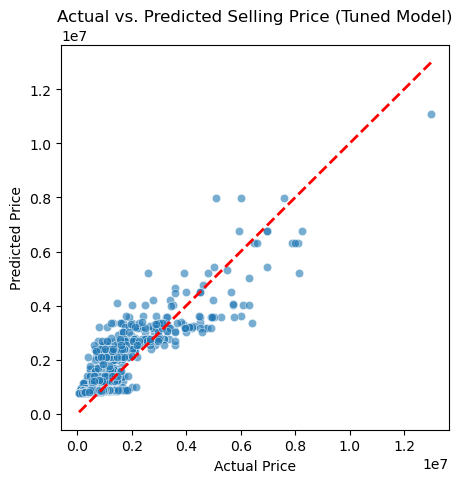

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test, y=y_pred_, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Selling Price (Tuned Model)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()